In [ ]:
# breast cancer classification using features of biopsied tumor samples

# data source: http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

'''
Source:

Creators: 

1. Dr. William H. Wolberg, General Surgery Dept. 
University of Wisconsin, Clinical Sciences Center 
Madison, WI 53792 
wolberg '@' eagle.surgery.wisc.edu 

2. W. Nick Street, Computer Sciences Dept. 
University of Wisconsin, 1210 West Dayton St., Madison, WI 53706 
street '@' cs.wisc.edu 608-262-6619 

3. Olvi L. Mangasarian, Computer Sciences Dept. 
University of Wisconsin, 1210 West Dayton St., Madison, WI 53706 
olvi '@' cs.wisc.edu 

Donor: 

Nick Street


Data Set Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link] 

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes. 

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34]. 

This database is also available through the UW CS ftp server: 
ftp ftp.cs.wisc.edu 
cd math-prog/cpo-dataset/machine-learn/WDBC/


Attribute Information:

1) ID number 
2) Diagnosis (M = malignant, B = benign) 
3-32) 

Ten real-valued features are computed for each cell nucleus: 

a) radius (mean of distances from center to points on the perimeter) 
b) texture (standard deviation of gray-scale values) 
c) perimeter 
d) area 
e) smoothness (local variation in radius lengths) 
f) compactness (perimeter^2 / area - 1.0) 
g) concavity (severity of concave portions of the contour) 
h) concave points (number of concave portions of the contour) 
i) symmetry 
j) fractal dimension ("coastline approximation" - 1)
'''

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import os

In [6]:
directory = 'C:/Users/smccubbi/Documents/Python_Scripts/Projects/1/BreastCancerWisconsin'
data = pd.read_csv(os.path.join(directory,'data.csv'))

In [7]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
# dataset is not missing any features, though the last column should be removed
data.count()

id                         569
diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
Unnamed:

Data needs to be filtered to remove Unnamed: 32 column NaN's and possibly 'id'. 'diagnosis' is the class label. Even if I don't know what the other labels are for, machine learning will decide if they are useful metrics for predicting a diagnosis.

In [10]:
# list feature names
col = data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [126]:
# assign labels to y and features to x
y = data['diagnosis']
# create feature array by dropping label and other columns/features that we cannot use 
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list, axis=1)
feature_names = x.columns
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of benign:  357
Number of malignant:  212


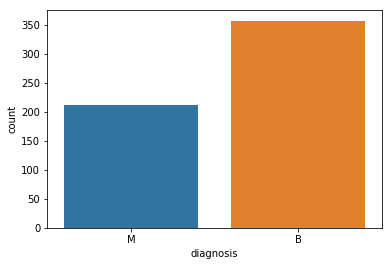

In [12]:
# look at some data visualizations
ax = sns.countplot(y, label='Count')
B, M = y.value_counts()
print('Number of benign: ', B)
print('Number of malignant: ', M)

In [13]:
# looking at the scale of the features, we can see that they need to be normalized
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


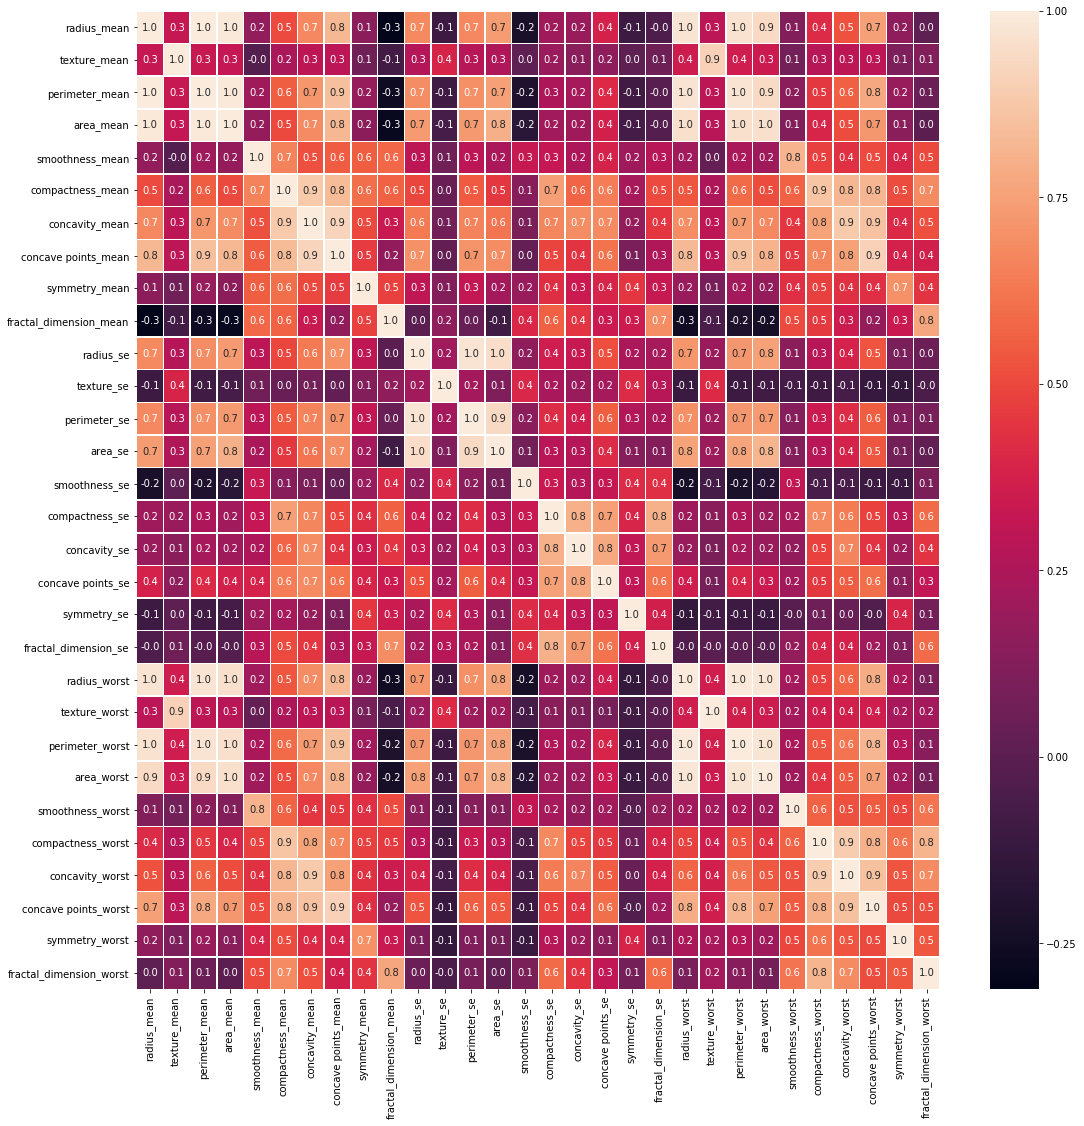

In [14]:
# start inspecting the data: this plot shows some strong correlations
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(x.corr(), annot=True, linewidths=0.5, fmt='0.1f', ax=ax)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

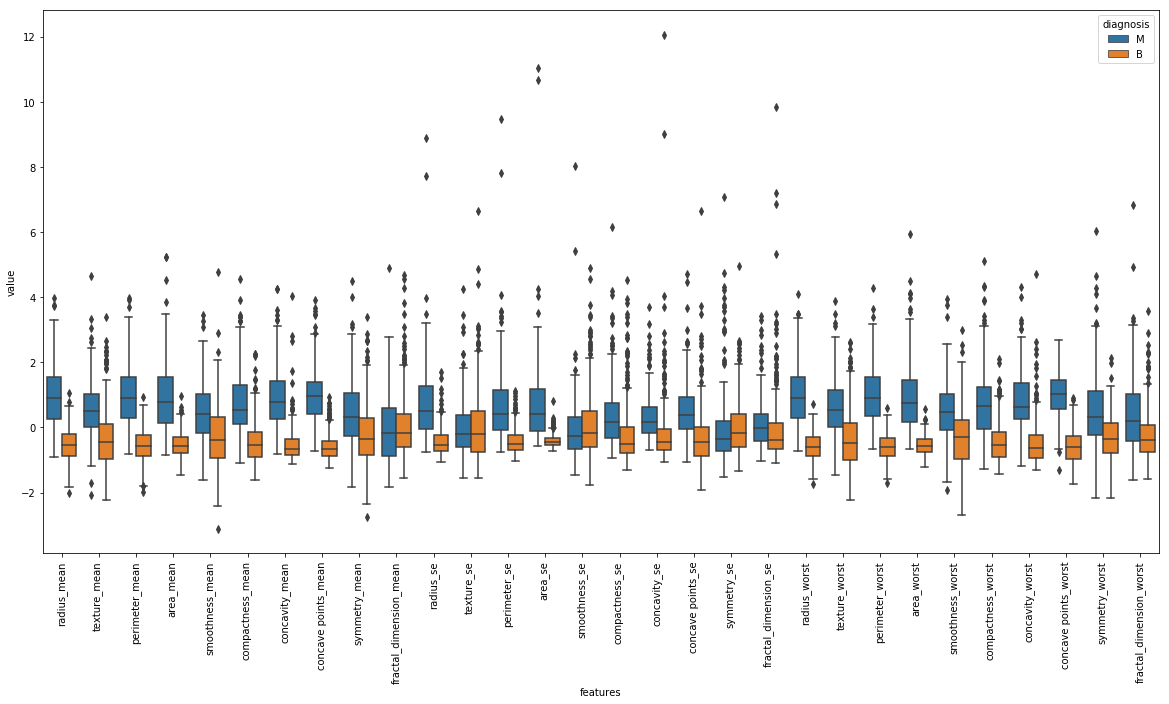

In [15]:
# normalize features
features = x
feat_norm = (features - features.mean())/(features.std()) 
features = pd.concat([y,feat_norm], axis=1) 
features = pd.melt(features, id_vars='diagnosis', var_name='features', value_name='value')

# box plots help show which features are good for separating the data
plt.figure(figsize=(20,10))
sns.boxplot(x='features', y='value', hue='diagnosis', data=features)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

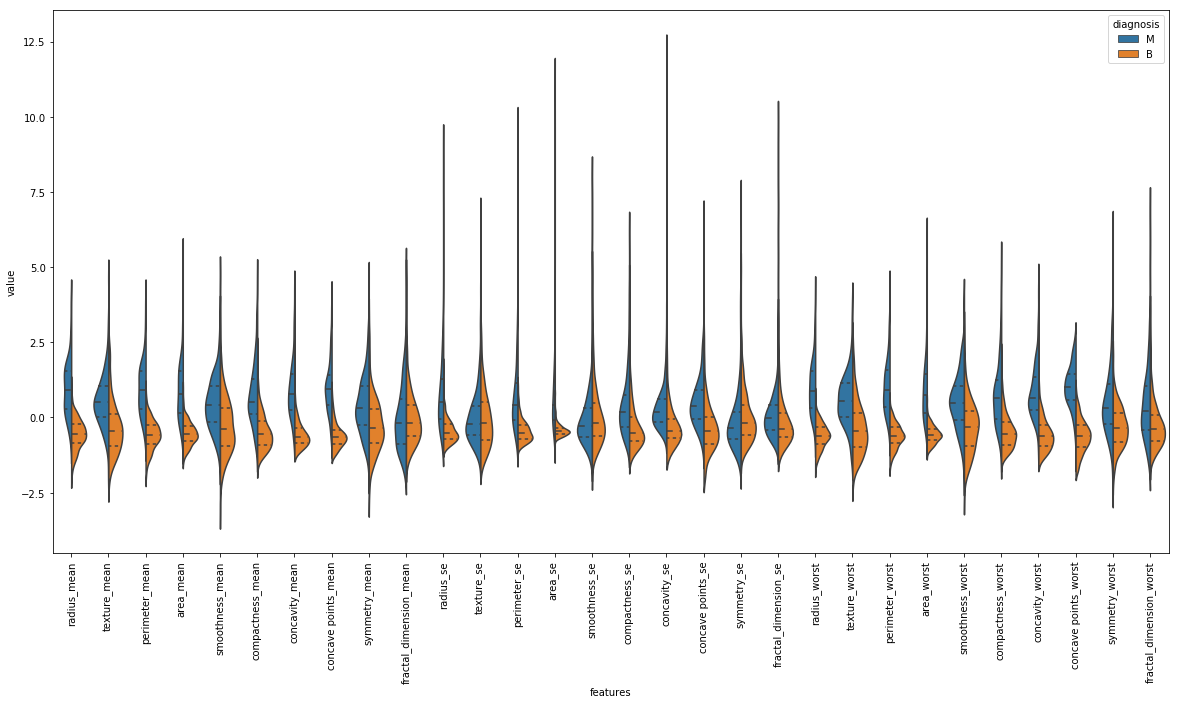

In [16]:
# split violin plot to look at distributions of features, by diagnosis
plt.figure(figsize=(20,10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=features, split=True, inner='quart')
plt.xticks(rotation=90)

In [25]:
# perform logistic regression with recursive feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# encode y to categorical
ydata=y.values
ydata[ydata=='M'] = 1
ydata[ydata=='B'] = 0
y=y.astype('int')

# convert to array and normalize
X = np.array(x.values)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# tuning logistic regression hyperparameters
log_clf = LogisticRegression(random_state = 42)
param_grid = {
    'penalty' : ['l2','l1'],
    'C' : [0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
}

CV_log_clf = GridSearchCV(estimator = log_clf,
                          param_grid = param_grid ,
                          scoring = 'accuracy',
                          verbose = True,
                          n_jobs = -1)

CV_log_clf.fit(X_train, y_train)

best_params = CV_log_clf.best_params_
print('Best parameters: ', best_params)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:   10.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.8s finished


Best parameters:  {'C': 0.1, 'penalty': 'l2'}


In [ ]:
# recursive feature elimination (rfe)

#Logistic regression with RFE
log_clf = LogisticRegression(C = best_parameters['C'], 
                                 penalty = best_parameters['penalty'], 
                                 random_state = random_state)

selector = RFE(log_clf)
selector = selector.fit(X_train, y_train)

y_pred = selector.predict(X_test)
y_score = selector.predict_proba(X_test)[:,1]

In [180]:
# run logistic regression with and without recursive feature elimination (RFECV)
from sklearn.feature_selection import RFE

# set up model with best hyperparameters (above)
CV_log_clf = LogisticRegression(C = best_params['C'], 
                                penalty = best_params['penalty'], 
                                random_state = 42)

# model without RFECV
CV_log_clf.fit(X_train, np.ravel(y_train))
y_pred = CV_log_clf.predict(X_test)
y_score = CV_log_clf.decision_function(X_test)

Optimal number of features : 16

Features sorted by their rank:
(1, 'area_se')
(1, 'area_worst')
(1, 'compactness_mean')
(1, 'compactness_se')
(1, 'concave points_mean')
(1, 'concavity_mean')
(1, 'concavity_worst')
(1, 'fractal_dimension_se')
(1, 'fractal_dimension_worst')
(1, 'perimeter_mean')
(1, 'radius_mean')
(1, 'radius_se')
(1, 'radius_worst')
(1, 'smoothness_se')
(1, 'texture_se')
(1, 'texture_worst')
(2, 'symmetry_worst')
(3, 'symmetry_se')
(4, 'area_mean')
(5, 'concavity_se')
(6, 'compactness_worst')
(7, 'concave points_se')
(8, 'fractal_dimension_mean')
(9, 'smoothness_worst')
(10, 'perimeter_se')
(11, 'concave points_worst')
(12, 'symmetry_mean')
(13, 'perimeter_worst')
(14, 'texture_mean')
(15, 'smoothness_mean')


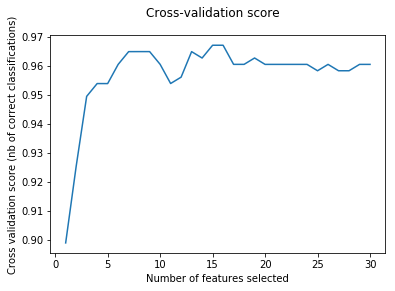

In [181]:
# run model with RFECV

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=30, n_informative=2,
                           n_redundant=2, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear", probability=True)
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X_train, np.ravel(y_train))

rfecv.transform(X_train)

y_pred_rfecv = rfecv.predict(X_test)
y_score_rfecv = rfecv.predict_proba(X_test)

print("Optimal number of features : %d" % rfecv.n_features_)

print("\nFeatures sorted by their rank:")
feature_list = sorted(zip(map(lambda x: round(x, 4), rfecv.ranking_), feature_names))
for item in feature_list:
    print(item)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.suptitle('Cross-validation score')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [28]:
# modified from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes# [unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[71  0]
 [ 1 42]]
Confusion matrix, without normalization
[[70  1]
 [ 3 40]]


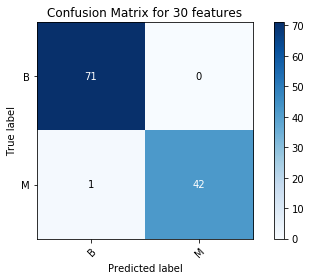

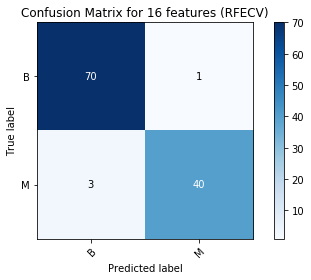

In [161]:
# plot test results
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

# Confusion matrix for all features
plot_confusion_matrix(y_test, y_pred, ['B','M'],
                          normalize=False,
                          title='Confusion Matrix for {} features'.format(CV_log_clf.coef_.shape[1]),
                          cmap=plt.cm.Blues)

# Confusion matrix for reduced feature set (RFECV)
plot_confusion_matrix(y_test, y_pred_rfecv, ['B','M'],
                          normalize=False,
                          title='Confusion Matrix for {} features (RFECV)'.format(rfecv.n_features_),
                          cmap=plt.cm.Blues)

In [182]:
# logistic regression scoring metrics

from sklearn.model_selection import cross_val_score

def cross_val_metrics(model) :
    metrics = ['accuracy', 'precision', 'recall']
    for metric in metrics:
        scores = cross_val_score(model, X, y, cv = 5, scoring = metric)
        print('   [%s] : %0.5f (+/- %0.5f)'%(metric, scores.mean(), scores.std()))

print('Logistic Regression w/o RFECV:')
# RFEcross_val_metrics(CV_log_clf)       

Logistic Regression w/o RFECV:
   [accuracy] : 0.91397 (+/- 0.01845)
   [precision] : 0.91877 (+/- 0.02878)
   [recall] : 0.91065 (+/- 0.01580)


In [184]:
# Scoring for model with RFECV

rfecv_acc = rfecv.score(X_test,y_test)
rfecv_cm = np.ravel(confusion_matrix(y_test, y_pred_rfecv))
rfecv_prec = rfecv_cm[3]/(rfecv_cm[3]+rfecv_cm[1])
rfecv_recall = rfecv_cm[3]/(rfecv_cm[3]+rfecv_cm[2])

print('Logistic Regression w/ RFECV:')
print('   [accuracy]  : {0:.3f}'.format(rfecv_acc))
print('   [precision] : {0:.3f}'.format(rfecv_prec))
print('   [recall]    : {0:.3f}'.format(rfecv_recall))

Logistic Regression w/ RFECV:
   [accuracy]  : 0.965
   [precision] : 0.976
   [recall]    : 0.930


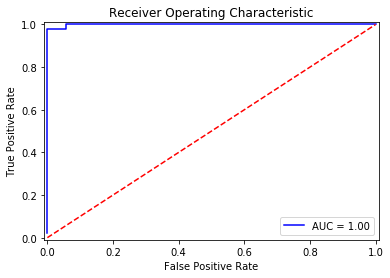

In [186]:
# ROC for logistic regression model

from sklearn import metrics

y_score = CV_log_clf.decision_function(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [88]:
# now use keras to build a shallow log reg model, with help from sklearn

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras import layers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# reload data, split into features (x2) and labels (y2), and drop columns that will not be useful to model
data2 = pd.read_csv(os.path.join(directory,'data.csv'))
y2 = data2['diagnosis']
x2 = data2.drop(['id','diagnosis','Unnamed: 32'], axis=1)

# scale the data
x2 = preprocessing.scale(x2)

# encode the string labels
encoder = LabelBinarizer()
y2 = encoder.fit_transform(y2)

# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

# build shallow model for binary classification
model = Sequential()
model.add(layers.Dense(15, input_shape=(x2.shape[1],), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# set up early stopping callback function
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, min_delta=0)

# fit model
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, verbose=0, callbacks=[es])

# store fitting history parameters
history_dict = history.history

Epoch 00088: early stopping


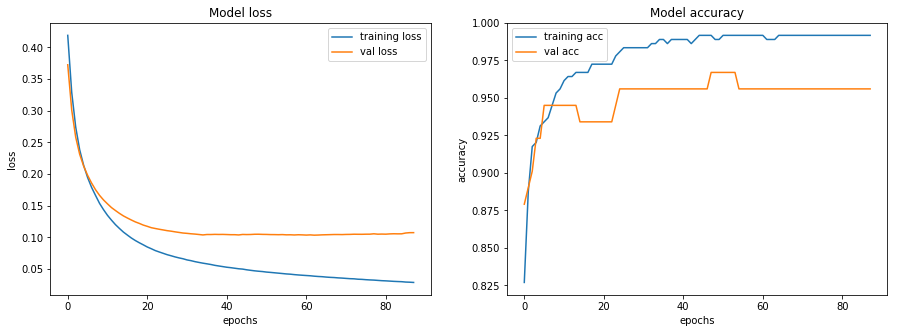

In [188]:
# plot training and validation loss  and accuracy vs. epochs

# set up values
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['acc']
val_acc = history_dict['val_acc']

# set up figure
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15,5))

# loss plot
ax1.plot(train_loss, label='training loss')
ax1.plot(val_loss, label='val loss')
ax1.set_title('Model loss')
ax1.set(xlabel='epochs', ylabel='loss')
ax1.legend()

# accuracy plot
ax2.plot(train_acc, label='training acc')
ax2.plot(val_acc, label='val acc')
ax2.set_title('Model accuracy')
ax2.set(xlabel='epochs', ylabel='accuracy')
ax2.legend()

In [189]:
# now run model on the test data to see how it performs
loss, acc = model.evaluate(X_test, y_test)
print('    Loss using test data: {0:.3f}'.format(loss))
print('Accuracy using test data: {0:.3f}'.format(acc))

114/114 [==============================] - 0s 2ms/step
    Loss using test data: 0.061
Accuracy using test data: 0.982
